In [109]:
# Mount your Google Drive to this notebook
# The purpose is to allow your code to access to your files
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [112]:
opencv_dataset = pd.read_csv("evaluation.csv")

In [113]:
cnn_dataset = pd.read_csv("CNNAccuracy.csv")

In [114]:
print(cnn_dataset.head)

<bound method NDFrame.head of            name  Accuracy
0      car0.png  0.117978
1      car1.png  0.180240
2     car10.png  0.462171
3    car100.png  0.000000
4    car101.png  0.000000
..          ...       ...
292   car95.png  0.000000
293   car96.png  0.000000
294   car97.png  0.000000
295   car98.png  0.119285
296   car99.png  0.000000

[297 rows x 2 columns]>


In [115]:
final_dataset = pd.merge(left=opencv_dataset, right=cnn_dataset, left_on='image_names', right_on='name')

In [116]:
print(final_dataset.head)

<bound method NDFrame.head of      Gaussian  MedianBlur  BilateralFilter     Canny  Laplacian  Sobel  \
0    0.000000    0.000000         0.000000  0.000000  -1.000000    0.0   
1    0.000000    0.000000        -1.000000  0.000000   0.000000   -1.0   
2    0.000000    0.000000        -1.000000  0.000000  -1.000000   -1.0   
3    0.000000    0.000000        -1.000000  0.000000  -1.000000   -1.0   
4    0.000000    0.000000         0.000000  0.000000   0.000000   -1.0   
..        ...         ...              ...       ...        ...    ...   
292  0.000000   -1.000000         0.000000  0.000000   0.000000    0.0   
293  0.990240    0.975595         0.977186  0.990240   0.012012   -1.0   
294 -1.000000   -1.000000        -1.000000 -1.000000  -1.000000   -1.0   
295  0.452203   -1.000000        -1.000000  0.452203   0.795945    0.0   
296 -1.000000    0.000000        -1.000000 -1.000000  -1.000000   -1.0   

    image_names        name  Accuracy  
0     car99.png   car99.png  0.000000  
1

In [117]:
error_standard = 0.4

In [118]:
# Getting the correctly classified number of images for every technique
guassian_score = np.count_nonzero(final_dataset["Gaussian"] > error_standard)
median_score = np.count_nonzero(final_dataset["MedianBlur"] > error_standard)
bilateral_score = np.count_nonzero(final_dataset["BilateralFilter"] > error_standard)
canny_score = np.count_nonzero(final_dataset["Canny"] > error_standard)
laplacian_score = np.count_nonzero(final_dataset["Laplacian"] > error_standard)
sobel_score = np.count_nonzero(final_dataset["Sobel"] > error_standard)
cnn_score = np.count_nonzero(final_dataset["Accuracy"] > error_standard)

In [119]:
def addlabels(x,y):       # https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

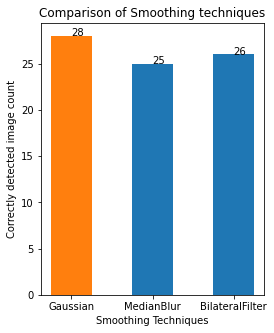

In [120]:
# Graph for comparison of different smoothing techniques
x = ["Gaussian","MedianBlur","BilateralFilter"]
y = [guassian_score,median_score,bilateral_score]

fig = plt.figure(figsize = (4, 5))

plt.bar(x, y, color=["C1","C0","C0"], width = 0.5)
addlabels(x, y) 
plt.xlabel("Smoothing Techniques")
plt.ylabel("Correctly detected image count")
plt.title("Comparison of Smoothing techniques")
plt.show()

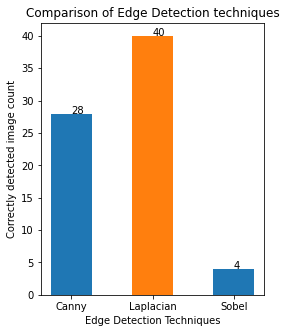

In [121]:
# Graph for comparison of different edge detection techniques
x = ["Canny","Laplacian","Sobel"]
y = [canny_score,laplacian_score,sobel_score]

fig = plt.figure(figsize = (4, 5))

plt.bar(x, y, color=["C0","C1","C0"], width = 0.5)
addlabels(x, y)
plt.xlabel("Edge Detection Techniques")
plt.ylabel("Correctly detected image count")
plt.title("Comparison of Edge Detection techniques")
plt.show()

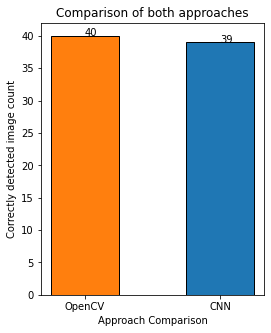

In [122]:
# Graph of comparison of approaches
x = ["OpenCV","CNN"]
y = [laplacian_score,cnn_score]

fig = plt.figure(figsize = (4, 5))
plt.bar(x, y, color=["C1","C0"],  edgecolor='black', width = 0.5)
addlabels(x, y)
plt.xlabel("Approach Comparison")
plt.ylabel("Correctly detected image count")
plt.title("Comparison of both approaches")
plt.show()

In [131]:
# Calculation for performance of both approaches for different error thresholds
error_thresholds = [0.1,0.4,0.5,0.7,0.8]
opencv_scores = []
cnn_scores = []


for error_threshold in error_thresholds:
  laplacian_score = np.count_nonzero(final_dataset["Laplacian"] > error_threshold)
  cnn_score = np.count_nonzero(final_dataset["Accuracy"] > error_threshold)

  opencv_scores.append(laplacian_score)
  cnn_scores.append(cnn_score)

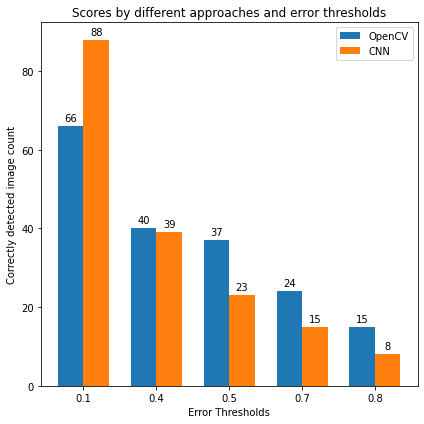

In [133]:
# Graph for performance approaches for various error thresholds
labels = [str(i) for i in error_thresholds]                    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

x = np.arange(len(opencv_scores))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, opencv_scores, width, label='OpenCV')
rects2 = ax.bar(x + width/2, cnn_scores, width, label='CNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Correctly detected image count')
ax.set_xlabel('Error Thresholds')
ax.set_title('Scores by different approaches and error thresholds')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_figheight(6)
fig.tight_layout()

plt.show()

In [125]:
# Calculation for performance on various different images
error_margin = 0.7
image_names = []
opencv_scores = []
cnn_scores = []

for index, row in final_dataset.iterrows():
    if row["Laplacian"] > error_margin or row["Accuracy"] > error_margin:
      image_names.append(row["image_names"][:-4])           # Stripping the .png from the image names
      if row["Laplacian"] < 0 :
        opencv_scores.append(0)
      else:
        opencv_scores.append(row["Laplacian"])

      cnn_scores.append(row["Accuracy"])

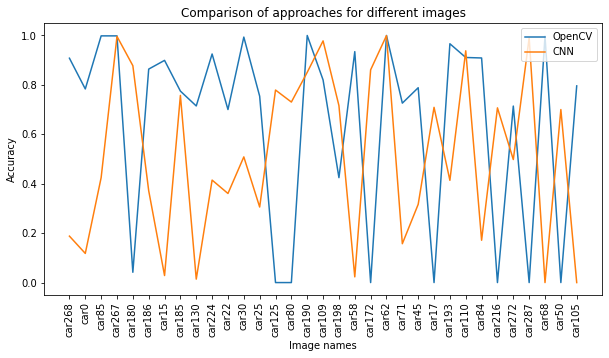

In [126]:
# Performance calculation of different images across both approaches
fig = plt.figure(figsize = (10, 5))
plt.plot(image_names, opencv_scores, label="OpenCV") 
plt.plot(image_names, cnn_scores, label="CNN") 
plt.xticks(rotation = 90) 
plt.title("Comparison of approaches for different images")
plt.xlabel("Image names")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()